## Summary

We will use [Listings](http://insideairbnb.com/get-the-data) for Paris, France

In [206]:
#Chargement des packages et modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn import set_config
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.datasets import fetch_california_housing, fetch_openml, load_boston, load_diabetes
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_percentage_error,
                             max_error,
                            )
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder

import pickle

In [207]:
os.getcwd()

'C:\\Users\\Acer\\Desktop\\SEP\\produit_digital'

In [208]:
#Chargez le fichier de données dans un objet appelé "data"

data =pd.read_csv('listings.csv', delimiter=",")

In [209]:
df_airbnb = data.copy()
df_airbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,52931,https://www.airbnb.com/rooms/52931,20230904181324,2023-09-06,previous scrape,Rental unit in Paris · ★4.65 · 2 bedrooms · 2 ...,I will be delighted to welcome you to my charm...,"In some streets, Les Épinettes has also become...",https://a0.muscache.com/pictures/miso/Hosting-...,50502817,...,4.71,4.24,4.24,7511706944917,t,382,378,4,0,1.65
1,53353,https://www.airbnb.com/rooms/53353,20230904181324,2023-09-05,city scrape,Rental unit in Paris · ★4.82 · 2 bedrooms · 3 ...,A 100 m2 Loft/apartment (with 20 m2 terrace) o...,NEIGHBORHOOD: Montmartre-Clichy-Pigalles-Les F...,https://a0.muscache.com/pictures/2a1726b5-5a09...,37051412,...,4.91,4.48,4.73,7511800114704,f,1,1,0,0,0.24
2,3109,https://www.airbnb.com/rooms/3109,20230904181324,2023-09-05,city scrape,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.11
3,54377,https://www.airbnb.com/rooms/54377,20230904181324,2023-09-05,city scrape,Rental unit in Paris · ★4.94 · 1 bedroom · 1 b...,We love Paris. Giving tourists the opportunity...,The district is cosmopolitan and particularly ...,https://a0.muscache.com/pictures/miso/Hosting-...,247562,...,5.00,4.57,4.88,7511800523290,f,1,0,1,0,1.19
4,5396,https://www.airbnb.com/rooms/5396,20230904181324,2023-09-05,city scrape,Rental unit in Paris · ★4.56 · Studio · 1 bed ...,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.83,4.95,4.55,7510402838018,f,1,1,0,0,2.05


<h3> PREPROCESSING</h3>

In [210]:
df_airbnb['bathrooms_text']

0             1.5 baths
1             2.5 baths
2                1 bath
3        1 private bath
4                1 bath
              ...      
67937            1 bath
67938           3 baths
67939           3 baths
67940            1 bath
67941            1 bath
Name: bathrooms_text, Length: 67942, dtype: object

In [211]:
df_airbnb['bathrooms_clean'] =df_airbnb['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)

# Affichez le dataframe avec la nouvelle colonne 'Bathrooms' transformée en numérique
print(df_airbnb['bathrooms_clean'])

0        1.5
1        2.5
2        1.0
3        1.0
4        1.0
        ... 
67937    1.0
67938    3.0
67939    3.0
67940    1.0
67941    1.0
Name: bathrooms_clean, Length: 67942, dtype: float64


In [212]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67942 entries, 0 to 67941
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            67942 non-null  int64  
 1   listing_url                                   67942 non-null  object 
 2   scrape_id                                     67942 non-null  int64  
 3   last_scraped                                  67942 non-null  object 
 4   source                                        67942 non-null  object 
 5   name                                          67942 non-null  object 
 6   description                                   67416 non-null  object 
 7   neighborhood_overview                         38031 non-null  object 
 8   picture_url                                   67942 non-null  object 
 9   host_id                                       67942 non-null 

In [213]:
df_airbnb["amenities"]
df_airbnb["neighbourhood_cleansed"]

0        Batignolles-Monceau
1          Buttes-Montmartre
2               Observatoire
3          Buttes-Montmartre
4             Hôtel-de-Ville
                ...         
67937           Ménilmontant
67938             Popincourt
67939                 Louvre
67940                  Opéra
67941         Hôtel-de-Ville
Name: neighbourhood_cleansed, Length: 67942, dtype: object

In [214]:
import pandas as pd
import ast

# Supposons que votre dataframe s'appelle df
# Convertissez la colonne 'amenities' en listes Python
df_airbnb['amenities'] = df_airbnb['amenities'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

df_airbnb['amenities'] 




0        [Microwave, Hot water kettle, Cleaning product...
1        [Children’s books and toys for ages 2-5 years ...
2        [Hangers, Washer, Paid parking off premises, S...
3        [Microwave, Courtyard view, Paid parking off p...
4        [Hot water kettle, Cleaning products, Fire ext...
                               ...                        
67937    [Hangers, Microwave, Essentials, TV, Iron, Wif...
67938    [Microwave, Hot water kettle, Lockbox, Dedicat...
67939    [Hangers, Carbon monoxide alarm, Essentials, T...
67940    [Microwave, Hot water kettle, Coffee maker, HD...
67941    [Microwave, Hot water kettle, Patio or balcony...
Name: amenities, Length: 67942, dtype: object

In [215]:
# Créez une série contenant toutes les amenities
all_amenities = pd.Series([amenity for amenities_list in df_airbnb['amenities'] for amenity in amenities_list])

# Comptez la fréquence de chaque amenity
amenities_counts = all_amenities.value_counts()

# Affichez les amenities les plus fréquentes
print(amenities_counts.head(20))  # Vous pouvez ajuster le nombre d'éléments à afficher




Kitchen                  63551
Wifi                     60669
Essentials               58332
Smoke alarm              51016
Hair dryer               48308
Iron                     45549
Heating                  45399
Hot water                45124
Hangers                  44234
Dishes and silverware    42212
Washer                   42209
Cooking basics           39963
Refrigerator             38790
Bed linens               38530
Shampoo                  35599
Microwave                31102
TV                       30772
Dedicated workspace      25109
Cleaning products        24730
Oven                     23959
dtype: int64


In [216]:
# Sélectionnez les amenities les plus fréquentes (par exemple, les 20 premières)
frequent_amenities = amenities_counts.head(20).index

# Créez des variables indicatrices uniquement pour les amenities les plus fréquentes
amenities_dummies = pd.get_dummies(df_airbnb['amenities'].apply(lambda x: [amenity for amenity in x if amenity in frequent_amenities]).apply(pd.Series).stack()).sum(level=0)

# Ajoutez les variables indicatrices au dataframe d'origine
df_airbnb = pd.concat([df_airbnb, amenities_dummies], axis=1)

# Affichez le dataframe avec les nouvelles variables indicatrices
print(df_airbnb)


C:\Users\Acer\AppData\Local\Temp\ipykernel_3104\3673695309.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  amenities_dummies = pd.get_dummies(df_airbnb['amenities'].apply(lambda x: [amenity for amenity in x if amenity in frequent_amenities]).apply(pd.Series).stack()).sum(level=0)
C:\Users\Acer\AppData\Local\Temp\ipykernel_3104\3673695309.py:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  amenities_dummies = pd.get_dummies(df_airbnb['amenities'].apply(lambda x: [amenity for amenity in x if amenity in frequent_amenities]).apply(pd.Series).stack()).sum(level=0)


                       id                                      listing_url  \
0                   52931               https://www.airbnb.com/rooms/52931   
1                   53353               https://www.airbnb.com/rooms/53353   
2                    3109                https://www.airbnb.com/rooms/3109   
3                   54377               https://www.airbnb.com/rooms/54377   
4                    5396                https://www.airbnb.com/rooms/5396   
...                   ...                                              ...   
67937  972886538090125888  https://www.airbnb.com/rooms/972886538090125888   
67938  972890854868668144  https://www.airbnb.com/rooms/972890854868668144   
67939  972894575720459810  https://www.airbnb.com/rooms/972894575720459810   
67940  972904630185591405  https://www.airbnb.com/rooms/972904630185591405   
67941  972916211667468705  https://www.airbnb.com/rooms/972916211667468705   

            scrape_id last_scraped           source  \
0      2

Space,Access, Transit,Interaction,House_Rules, Property_Type,Room_Type,Accommodates,Bathrooms,Bedrooms, Beds, Bed_Type, Amenities,Square_Feet,   Minimum Nights,Maximum_Nights, Availability_30,  Accommodates, Bedrooms, Beds, Bed Type, Ameneties, Square Feet,  

In [217]:
df_airbnb.isna().sum()

id                0
listing_url       0
scrape_id         0
last_scraped      0
source            0
               ... 
Shampoo         197
Smoke alarm     197
TV              197
Washer          197
Wifi            197
Length: 96, dtype: int64

In [218]:
# Fonction pour convertir la colonne 'price' en numérique
df_airbnb.price=df_airbnb.price.replace('[$,]', '', regex=True).astype(float)


In [219]:
df_airbnb.price

0        209.0
1        297.0
2        110.0
3        120.0
4        140.0
         ...  
67937    105.0
67938    290.0
67939    280.0
67940    406.0
67941    325.0
Name: price, Length: 67942, dtype: float64

In [220]:
# Afficher les statistiques descriptives de la variable 'price'
print(df_airbnb['price'].describe())

count    67942.000000
mean       205.105914
std        482.048444
min          8.000000
25%         80.000000
50%        125.000000
75%        209.000000
max      63594.000000
Name: price, dtype: float64


In [221]:
#verifier s'il ya des valeurs manquantes
df_airbnb['price'].isna().sum()

0

In [222]:
#Verifier s'il existe des doublons
df_airbnb.loc[df_airbnb['id'].duplicated(keep=False), :]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,Iron,Kitchen,Microwave,Oven,Refrigerator,Shampoo,Smoke alarm,TV,Washer,Wifi


In [223]:
# Calculer la médiane de la variable 'Price'
#median_price = df_airbnb['price'].median()

# Remplacer les valeurs manquantes par la médiane
#df_airbnb['price'].fillna(median_price, inplace=True)

In [224]:
#df_airbnb.loc[df_airbnb['Price'].isnull(), :]

In [225]:
#definition de la variable d'inteérêt
y=df_airbnb['price']
y.describe()

count    67942.000000
mean       205.105914
std        482.048444
min          8.000000
25%         80.000000
50%        125.000000
75%        209.000000
max      63594.000000
Name: price, dtype: float64

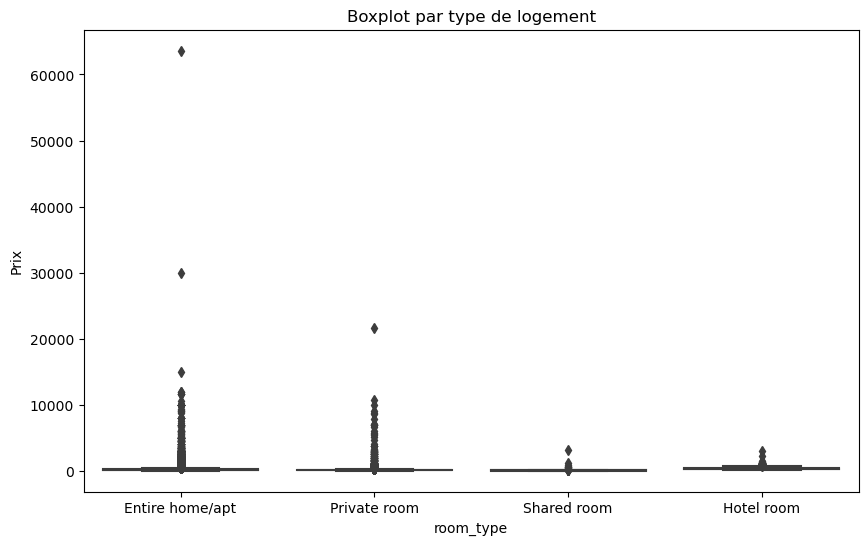

In [226]:
# Créer un boxplot
import seaborn as sns  # Importation de seaborn pour des options de style supplémentaires


plt.figure(figsize=(10, 6))  # Spécifiez la taille de la figure (largeur, hauteur)

# Utilisez seaborn pour améliorer le style du boxplot
sns.boxplot(data=df_airbnb, x='room_type', y='price')  # showfliers=False pour ne pas afficher les valeurs aberrantes

plt.title('Boxplot par type de logement')
plt.ylabel('Prix')
plt.show()

In [227]:
#correction des valeurs extrêmes de price


#### Variables pouvant expliquer le prix d'un airbnb

- Nombre de chambres (bedrooms)
- Nombre de salles de bains (bathrooms)
- Capacité d'accueil (accommodates)
- Type de logement (entire home, private room, shared room, etc.)
- Quartier (neighbourhood)
- Équipements (amenities)
- Distance par rapport aux attractions touristiques ou au centre-ville
- Nombre minimal de nuits (minimum nights)
- Disponibilité du logement (availability)

Kitchen                  63551
Wifi                     60669
Essentials               58332
Smoke alarm              51016
Hair dryer               48308
Iron                     45549
Heating                  45399
Hot water                45124
Hangers                  44234
Dishes and silverware    42212
Washer                   42209
Cooking basics           39963
Refrigerator             38790
Bed linens               38530
Shampoo                  35599
Microwave                31102
TV                       30772
Dedicated workspace      25109
Cleaning products        24730

In [228]:
df_airbnb.dtypes

id                int64
listing_url      object
scrape_id         int64
last_scraped     object
source           object
                 ...   
Shampoo         float64
Smoke alarm     float64
TV              float64
Washer          float64
Wifi            float64
Length: 96, dtype: object

In [241]:
X = df_airbnb[[ 'neighbourhood_cleansed','room_type','accommodates','Kitchen','Wifi','Essentials','Smoke alarm','Hair dryer','Iron','Heating','Hot water','Hangers','Shampoo','Dedicated workspace','Microwave','TV','Washer','minimum_nights', 'availability_365']]
X

,neighbourhood_cleansed,room_type,accommodates,Kitchen,Wifi,Essentials,Smoke alarm,Hair dryer,Iron,Heating,Hot water,Hangers,Shampoo,Dedicated workspace,Microwave,TV,Washer,minimum_nights,availability_365
0,Batignolles-Monceau,Entire home/apt,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3,20
1,Buttes-Montmartre,Entire home/apt,6,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2,358
2,Observatoire,Entire home/apt,2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2,253
3,Buttes-Montmartre,Private room,3,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3,69
4,Hôtel-de-Ville,Entire home/apt,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67937,Ménilmontant,Entire home/apt,4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,322
67938,Popincourt,Entire home/apt,10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,334
67939,Louvre,Entire home/apt,8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,313
67940,Opéra,Entire home/apt,8,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1,361


In [242]:
###variables qualitatives et quantitaitve
categorical_features = X.select_dtypes(include="object").columns
print(f"Categorical features:\n {categorical_features}\n")

numerical_features = X.select_dtypes(include="number").columns
print(f"Numerical features:\n {numerical_features}")

Categorical features:
 Index(['neighbourhood_cleansed', 'room_type'], dtype='object')

Numerical features:
 Index(['accommodates', 'Kitchen', 'Wifi', 'Essentials', 'Smoke alarm',
       'Hair dryer', 'Iron', 'Heating', 'Hot water', 'Hangers', 'Shampoo',
       'Dedicated workspace', 'Microwave', 'TV', 'Washer', 'minimum_nights',
       'availability_365'],
      dtype='object')


In [243]:
# Remplacer les valeurs manquantes dans les variables catégorielles par le mode
X[categorical_features] = X[categorical_features].apply(lambda col: col.fillna(col.mode()[0]))

# Remplacer les valeurs manquantes dans les variables numériques par la médiane
X[numerical_features] = X[numerical_features].apply(lambda col: col.fillna(col.median()))

# Affichage du DataFrame avec les valeurs manquantes remplacées
X.isna().sum()/X.shape[0]*100 

C:\Users\Acer\AppData\Local\Temp\ipykernel_3104\1745901578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_features] = X[categorical_features].apply(lambda col: col.fillna(col.mode()[0]))
C:\Users\Acer\AppData\Local\Temp\ipykernel_3104\1745901578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = X[numerical_features].apply(lambda col: col.fillna(col.median()))


neighbourhood_cleansed    0.0
room_type                 0.0
accommodates              0.0
Kitchen                   0.0
Wifi                      0.0
Essentials                0.0
Smoke alarm               0.0
Hair dryer                0.0
Iron                      0.0
Heating                   0.0
Hot water                 0.0
Hangers                   0.0
Shampoo                   0.0
Dedicated workspace       0.0
Microwave                 0.0
TV                        0.0
Washer                    0.0
minimum_nights            0.0
availability_365          0.0
dtype: float64

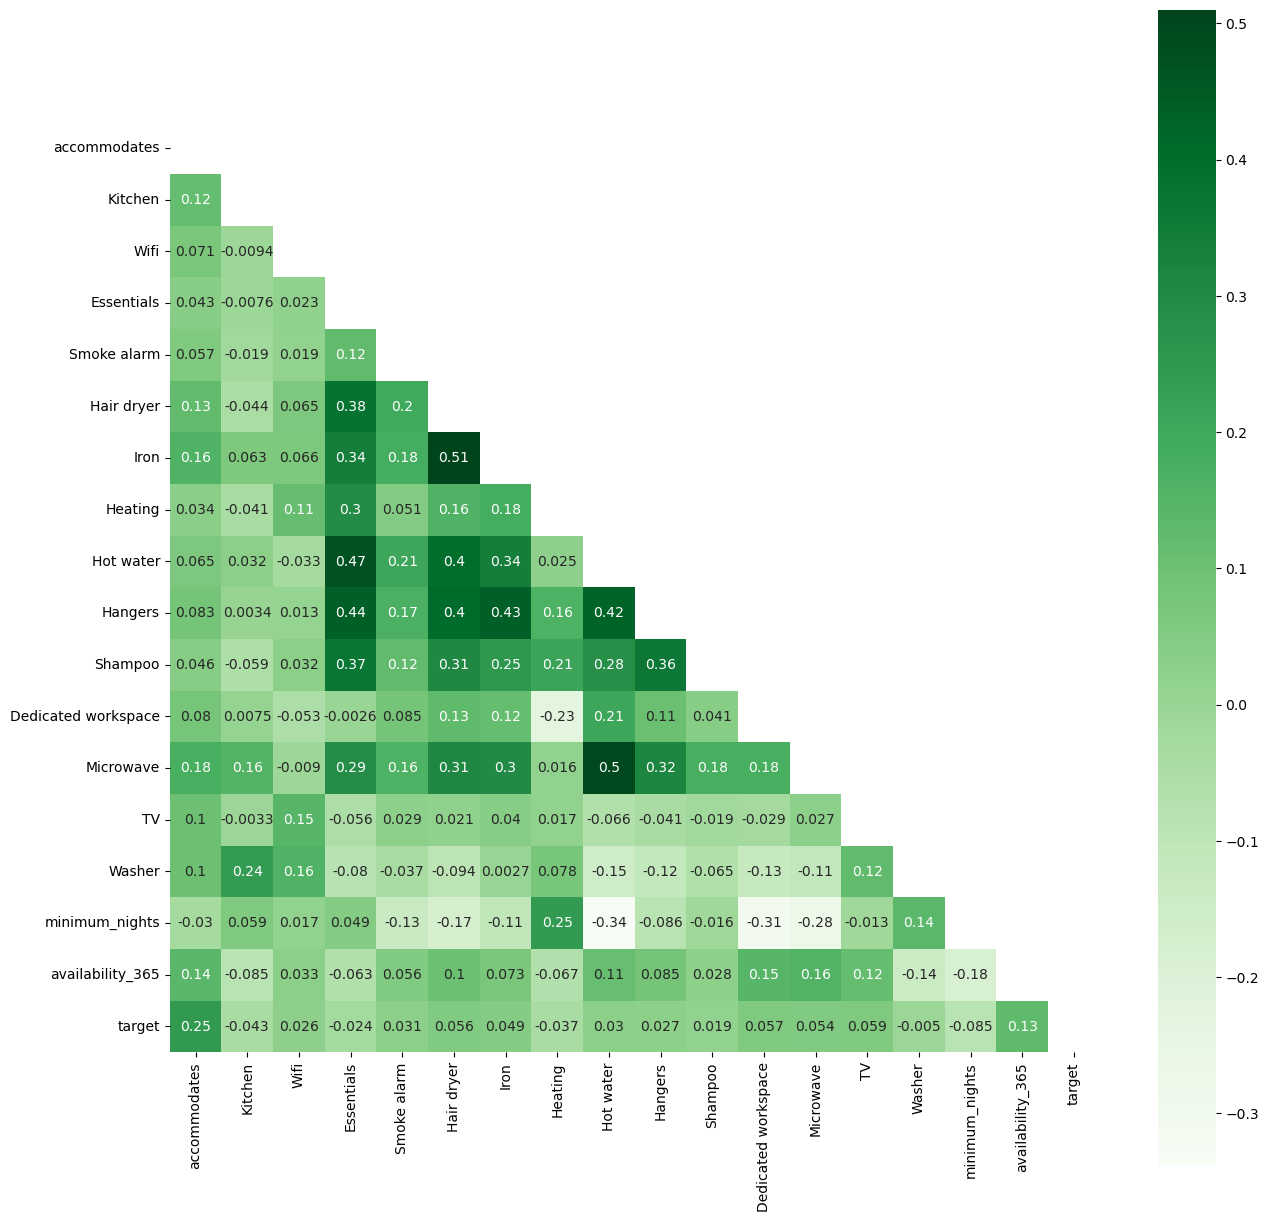

In [244]:
# correlation plot
plt.figure(figsize=(15, 15))
corr = X.assign(target=y).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='Greens', annot=True, square=True, mask=mask, cbar=True, vmin=None, vmax=None);

<h3> REGRESSION LINEAIRE</h3>

In [189]:
categorical_transformer = make_pipeline(*[SimpleImputer(strategy='most_frequent'),
                                          OneHotEncoder(handle_unknown="ignore")]
                                       )

numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                                      ("scaler", StandardScaler())]
                              )


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append regressor to preprocessing pipeline.
# Now we have a full prediction pipeline.


reg = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)
reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['accommodates', 'bedrooms', 'bathrooms_clean', 'Kitchen', 'Wifi',
       'Essentials', 'Smoke alarm', 'Hair dryer', 'Refrigerator', 'Microwave',
       'TV', 'Cleaning products', 'Cooking basics', 'Washer', 'minimum_nights',
       'availability_365'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy=

### Train test split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=23)



### Evaluation du modèle

In [191]:
model_reg= reg.fit(X_train, y_train)

In [192]:
# cross validation only
cv_results = cross_validate(model_reg,
                            X_train, y_train,
                            cv=5,
                            scoring=("r2", "neg_mean_squared_error",
                                     "neg_mean_absolute_percentage_error", "neg_mean_absolute_error"),
                            return_train_score=True)
cv_result_reg = pd.DataFrame(cv_results)
cv_result_reg

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.258839,0.032368,0.131801,0.080796,-136024.842676,-267428.763892,-0.710970,-0.707757,-113.355251,-119.085140
1,0.253528,0.022203,0.044081,0.115187,-503152.750158,-175653.333037,-0.712812,-0.709981,-118.982735,-117.334649
2,0.308513,0.051779,0.156552,0.078428,-123697.568764,-270434.947030,-0.710794,-0.702911,-117.030789,-117.915769
3,0.258959,0.040031,0.119643,0.081411,-171217.082367,-258571.238049,-0.698341,-0.717648,-120.196837,-118.439845
4,0.276608,0.022202,0.072452,0.091161,-274756.758468,-232712.952862,-0.717167,-0.706393,-122.002215,-118.010544


In [193]:
#cv_result_reg[["train_r2", "test_r2"]].plot(kind="barh", figsize=(8, 5));

In [194]:
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [195]:
def get_performances(real_value, estimated_value, metrics):
    perfs = []
    for metric_func in metrics:
        perfs.append((metric_func.__name__, metric_func(real_value, estimated_value)))
    return pd.DataFrame(perfs, columns=["metric", "value"])


def get_all_performances(value_train, values_test, metrics):
    test_perfs = []
    train_perfs = []
    metric_names = []
    for metric_func in metrics:
        metric_name = metric_func.__name__
        metric_names.append(metric_name)
        train_perfs.append(metric_func(*value_train))
        test_perfs.append(metric_func(*values_test))
    perfs = {"metric": metric_names, "train": train_perfs, "test": test_perfs,}
    return pd.DataFrame(perfs)

In [196]:
METRICS = [r2_score,
           mean_squared_error,
           mean_absolute_percentage_error,
           max_error,
          ]
# get performance on single set
get_performances(real_value=y_test, estimated_value=y_test_pred, metrics=METRICS)

,metric,value
0,r2_score,0.186316
1,mean_squared_error,85803.352356
2,mean_absolute_percentage_error,0.712334
3,max_error,11323.418142


In [197]:
# get performances in train & test
get_all_performances(value_train=(y_train, y_train_pred),
                     values_test=(y_test, y_test_pred),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,0.087278,0.186316
1,mean_squared_error,241040.986400,85803.352356
2,mean_absolute_percentage_error,0.707589,0.712334
3,max_error,62947.794709,11323.418142


### Optimisation des hyperparamètres de la régression linéaire

In [198]:
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median","most_frequent"],
    "regressor__fit_intercept": [True, False],
    "preprocessor__num__scaler": [ StandardScaler(), MinMaxScaler(), RobustScaler()],
}


grid_search = GridSearchCV(reg, param_grid, cv=10, scoring="r2", return_train_score=True) # r2
# you can see the list of key for scoring: sorted(sklearn.metrics.SCORERS.keys())
grid_search

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['accommodates', 'bedrooms', 'bathrooms_clean', 'Kitchen', 'Wifi',
       'Essentials', 'Smoke alarm', 'Hair dryer', 'Refrigerator', 'Microwave',
       'TV', 'Cleaning products', 'C...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
         

In [199]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

Best params: {'preprocessor__num__imputer__strategy': 'mean', 'preprocessor__num__scaler': StandardScaler(), 'regressor__fit_intercept': True}


In [200]:
model_op= grid_search.best_estimator_

In [201]:
model_op.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['accommodates', 'bedrooms', 'bathrooms_clean', 'Kitchen', 'Wifi',
       'Essentials', 'Smoke alarm', 'Hair dryer', 'Refrigerator', 'Microwave',
       'TV', 'Cleaning products', 'Cooking basics', 'Washer', 'minimum_nights',
       'availability_365'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))

In [202]:
y_test_pred2 = model_op.predict(X_test)
y_train_pred2 = model_op.predict(X_train)

In [203]:
print(f"Model score - training data: {model_op.score(X_train, y_train)}")
print(f"Model score - test data: {model_op.score(X_test, y_test)}")

Model score - training data: 0.08727825743896378
Model score - test data: 0.1863164271378901


In [204]:
f=open('test.sav', 'wb')

In [205]:
pickle.dump(model,f)

NameError: name 'model' is not defined

### Modèle RIDGE

In [ ]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                       StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="most_frequent"),
                        OneHotEncoder(handle_unknown="ignore")]
reg_ridge = define_pipeline(estimator=RidgeCV,
                            parameters= {'alphas': 0.5},
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
reg_ridge

In [ ]:
# cross validation only
cv_results = cross_validate(reg_ridge,
                            X_train, y_train,
                            cv=5,
                            scoring=("r2", "neg_mean_squared_error",
                                     "neg_mean_absolute_percentage_error", "neg_mean_absolute_error"),
                            return_train_score=True)
cv_result_ridge = pd.DataFrame(cv_results)
cv_result_ridge

In [ ]:
cv_result_ridge[["train_r2", "test_r2"]].plot(kind="barh", figsize=(8, 5));

### XGBOOST

In [180]:
!pip install xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance

Defaulting to user installation because normal site-packages is not writeable


In [181]:
def define_pipeline(estimator,
                    parameters,
                    numeric_transformer,
                    categorical_transformer
                   ):
    """ Construct a Pipeline from the given transfomers & estimators
    """
    if not parameters:
        parameters = dict()
    numeric_transformer = make_pipeline(*numeric_transformer)
    categorical_transformer = make_pipeline(*categorical_transformer)


    preprocessor = ColumnTransformer(
        transformers=[
            ("num", make_pipeline(*numeric_transformer), make_column_selector(dtype_include="number")),
            ("cat", make_pipeline(*categorical_transformer), make_column_selector(dtype_include=["object"])),
        ]
    )

    # Append estimator to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    return Pipeline(steps=[("preprocessor", preprocessor), ("regressor", estimator(**parameters))])

In [182]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                       StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="most_frequent"),
                        OneHotEncoder(handle_unknown="ignore")]
reg_xgboost = define_pipeline(estimator=XGBRegressor,
                            parameters={'n_estimators':50,'max_depth':3},
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
reg_xgboost

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000253E87718E0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneho...
                              feature_types=None, gamma=None, gpu_id=None,
         

In [183]:
reg_xgboost.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000253E87718E0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneho...
                              feature_types=None, gamma=None, gpu_id=None,
         

In [184]:
y_test_pred = reg_xgboost.predict(X_test)
y_train_pred = reg_xgboost.predict(X_train)

In [185]:
def get_performances(real_value, estimated_value, metrics):
    perfs = []
    for metric_func in metrics:
        perfs.append((metric_func.__name__, metric_func(real_value, estimated_value)))
    return pd.DataFrame(perfs, columns=["metric", "value"])


def get_all_performances(value_train, values_test, metrics):
    test_perfs = []
    train_perfs = []
    metric_names = []
    for metric_func in metrics:
        metric_name = metric_func.__name__
        metric_names.append(metric_name)
        train_perfs.append(metric_func(*value_train))
        test_perfs.append(metric_func(*values_test))
    perfs = {"metric": metric_names, "train": train_perfs, "test": test_perfs,}
    return pd.DataFrame(perfs)

In [187]:
METRICS = [r2_score,
           mean_squared_error,
           mean_absolute_percentage_error,
           max_error,
          ]
# get performance on single set
get_performances(real_value=y_test, estimated_value=y_test_pred, metrics=METRICS)

,metric,value
0,r2_score,0.124119
1,mean_squared_error,92362.055259
2,mean_absolute_percentage_error,0.587224
3,max_error,11381.428970


In [188]:
# get performances in train & test
get_all_performances(value_train=(y_train, y_train_pred),
                     values_test=(y_test, y_test_pred),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,0.241089,0.124119
1,mean_squared_error,200421.161885,92362.055259
2,mean_absolute_percentage_error,0.575059,0.587224
3,max_error,51189.764648,11381.428970
